<h4> Download MNIST dataset, apply PCA from scratch. </h4>

Dataset Source: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

<h4><u>References:</u></h4>

https://www.askpython.com/python/examples/principal-component-analysis

https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51

For plotting:
https://www.statology.org/scree-plot-python/

<h3>Note: Follow the procedures the 'PCA - MNIST Dataset' Jupyter Notebook in the same folder, which makes more sense than this Notebook.</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = iris['data']
iris_labels = iris['target']

In [4]:
from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(iris_data)

data_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [5]:
# Center columns by subtracting by Mean
# In this case, no significant difference by centering the data.

data_centered = data_scaled - np.mean(data_scaled, axis=0)

np.mean(data_centered)

2.3684757858670006e-16

In [6]:
data_centered[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [7]:
# For correct dimensions, set 'rowvar' from default 'False' to 'True'
covariance = np.cov(data_centered, rowvar=False)

covariance.shape

(4, 4)

In [8]:
# np.eigh v/s np.eig: https://stackoverflow.com/questions/45434989/numpy-difference-between-linalg-eig-and-linalg-eigh
eigen_values, eigen_vectors = np.linalg.eigh(covariance)

In [9]:
# 'np.eigh' returns eigenvalues & eigenvectors in ascending sorted order
eigen_values[::-1]

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [10]:
eigen_values = eigen_values[::-1]

# Reverse the ordering of vectors, to their corresponding eigen values.
eigen_vectors = eigen_vectors[::-1]

In [11]:
eigen_vectors.shape

(4, 4)

<h4> Transform the Data using Eigen Vectors </h4>

In [12]:
data_transformed = np.dot(data_scaled, eigen_vectors.T)
data_transformed = data_transformed.T
data_transformed.shape

(4, 150)

In [13]:
# Find variance of each feature

variances = []

for i in range(len(data_scaled.T)):
    variances.append(data_transformed[i].var())

variances = np.array(variances)
variances

array([0.35659724, 1.61516208, 1.46010721, 0.56813347])

In [14]:
variance_percentage = [(i*100/sum(variances)) for i in variances]
variance_percentage = np.array(variance_percentage)
variance_percentage

array([ 8.91493109, 40.37905209, 36.50268019, 14.20333663])

This implies:

<ul>
    <li>PC1 explains 8.9%  of variance in the data</li>
    <li>PC2 explains 40.3% of variance in the data</li>
    <li>PC3 explains 36.5% of variance in the data</li>
    <li>PC4 explains 14.2% of variance in the data</li>
</ul>
    
Thus, PC2 > PC3 > PC4 > PC1 (in terms of Amount Variance explained).

In [22]:
# Get sorted indices (in descending order of '% Variance Explained')

sorted_indices = np.argsort(variance_percentage)
sorted_indices = list(sorted_indices[::-1])
print(sorted_indices)

variance_percentage = variance_percentage[sorted_indices]

[0, 1, 2, 3]


In [16]:
# Re-order the columns (in descending order of '% Variance Explained')

data_transformed = data_transformed[sorted_indices]
print(data_transformed)

[1, 2, 3, 0]
[[ 1.30769965e+00  1.66550460e+00  1.79289829e+00  1.92550930e+00
   1.37209252e+00  7.36875863e-01  1.74956513e+00  1.43891862e+00
   2.18377112e+00  1.71058065e+00  9.52327931e-01  1.63453045e+00
   1.83901554e+00  2.32038891e+00  4.61561125e-01  2.79176934e-01
   7.31307703e-01  1.23129860e+00  5.54664242e-01  1.13453955e+00
   1.05326310e+00  1.09085554e+00  1.75496395e+00  1.14810670e+00
   1.63870657e+00  1.57117878e+00  1.28750857e+00  1.21198179e+00
   1.24330678e+00  1.79707441e+00  1.73268155e+00  8.97676936e-01
   1.09208065e+00  6.90240840e-01  1.63417961e+00  1.50017656e+00
   9.17868014e-01  1.54560346e+00  2.14966205e+00  1.34180872e+00
   1.32701646e+00  2.20517032e+00  2.08422799e+00  1.10198945e+00
   1.06370667e+00  1.68621345e+00  1.21233264e+00  1.89140023e+00
   1.04943783e+00  1.47024361e+00 -1.31011253e+00 -8.06638266e-01
  -1.25390257e+00  5.07645983e-01 -7.71488002e-01  1.56801233e-01
  -8.15862361e-01  1.27704719e+00 -7.48512843e-01  5.90314472e-

In [17]:
variance_percentage

array([40.37905209, 36.50268019, 14.20333663,  8.91493109])

In [23]:
cusum = []
target = 90

s = 0
for i in range(len(variance_percentage)): 
    if s > target:
        cols = variance_percentage[:i]
        break

    s += variance_percentage[i]
    cusum.append(s)

cols

array([40.37905209, 36.50268019, 14.20333663])

In [24]:
print(f'''First '{len(cols)}' PCAs contribute to
{sum(cols):.2f}% variance in the data.''')

First '3' PCAs contribute to
91.09% variance in the data.


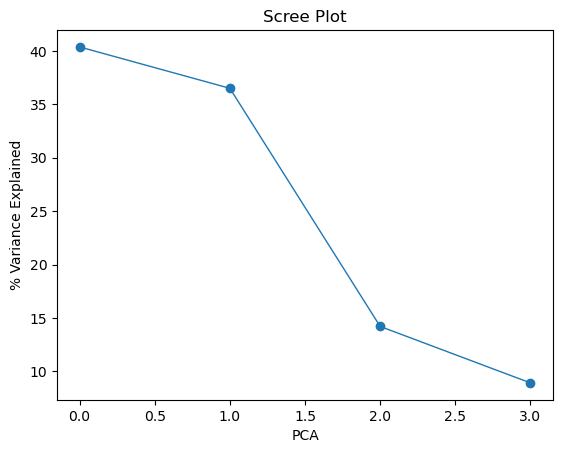

In [25]:
# SCREE PLOT
n_pca = len(cols)

x = [i for i in range(len(iris_data.T))]
plt.plot(x, variance_percentage, 'o-', linewidth=1)

plt.title("Scree Plot")
plt.xlabel("PCA")
plt.ylabel("% Variance Explained")

plt.show()

<AxesSubplot: >

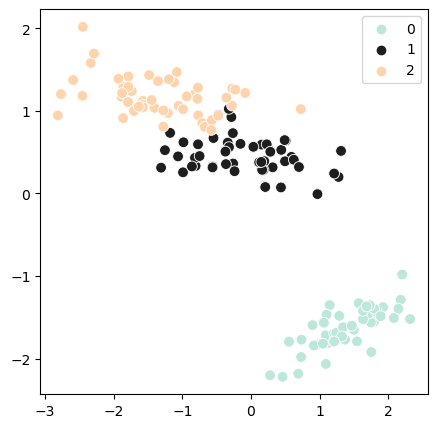

In [26]:
# 2D Scatterplot - PC1 vs PC2

import seaborn as sb

plt.figure(figsize=(5, 5))
sb.scatterplot(x=data_transformed[0], y=data_transformed[1], hue=iris_labels, palette= 'icefire', s=60)

<AxesSubplot: >

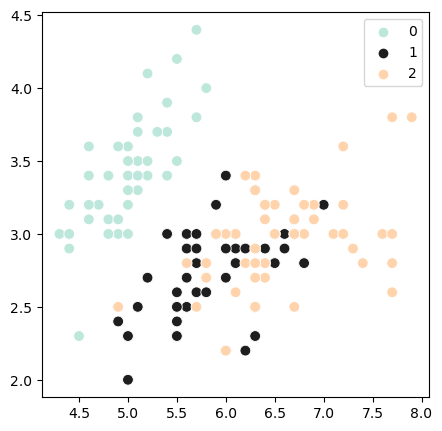

In [27]:
# 2D Scatterplot - Original Data's Features

import seaborn as sb

plt.figure(figsize=(5, 5))
sb.scatterplot(x=iris_data.T[0], y=iris_data.T[1], hue=iris_labels, palette= 'icefire', s=60)

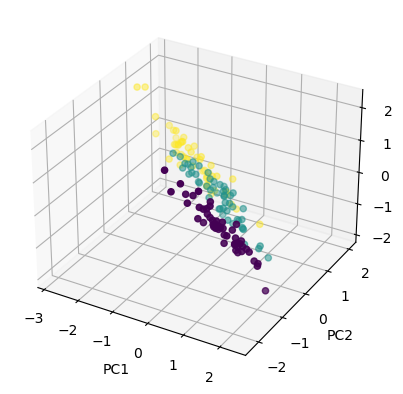

In [96]:
# 3D Plot of PC1 vs PC2 vs PC3
# Source: https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(data_transformed[0], data_transformed[1], data_transformed[2], c=iris_labels)

ax.set(xlabel="PC1", ylabel="PC2", zlabel="PC3")

plt.show()

Rotating the axes, to get a better view.

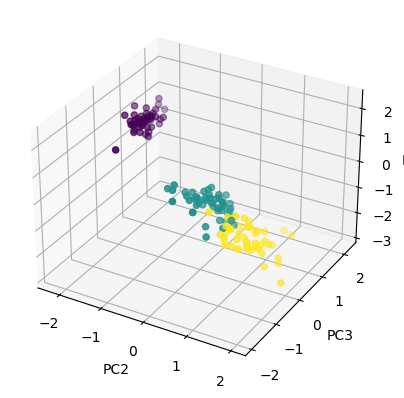

In [94]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(data_transformed[1], data_transformed[2], data_transformed[0], c=iris_labels)

ax.set(xlabel="PC2", ylabel="PC3", zlabel="PC1")

plt.show()


In [97]:
# More on 3D Plots: https://blog.finxter.com/matplotlib-3d-plot/